In [31]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Send request with correct headers
url = "https://www.amazon.in/s?k=mobiles"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 \
                   (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")

# Step 2: Parse product blocks
product_blocks = soup.find_all("div", {"data-component-type": "s-search-result"})

names = []
prices = []
ratings = []

# Step 3: Extract details
for product in product_blocks:
    name_tag = product.h2
    price_tag = product.find("span", class_="a-price-whole")
    rating_tag = product.find("span", class_="a-icon-alt")

    if name_tag and price_tag:
        name = name_tag.text.strip()
        price = price_tag.text.strip().replace(",", "")
        rating = rating_tag.text.split()[0] if rating_tag else None

        names.append(name)
        prices.append(price)
        ratings.append(rating)

# Step 4: Create DataFrame
df = pd.DataFrame({
    "Name": names,
    "Price": prices,
    "Rating": ratings
})

# Step 5: Clean data
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [32]:
df.head()

,Name,Price,Rating
0,"Redmi Note 14 5G (Phantom Purple, 6GB RAM 128G...",16999,3.8
1,OnePlus 13 | Smarter with OnePlus AI | Lifetim...,69997,4.4
2,"Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...",6499,4.0
3,"Redmi A4 5G (Starry Black, 4GB RAM, 128GB Stor...",8799,3.9
4,"iQOO Z10x 5G (Ultramarine, 6GB RAM, 128GB Stor...",13498,4.3


In [34]:
# Convert Price and Rating to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Drop rows with missing Price or Rating
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# Extract Brand (first word of Name)
df['Brand'] = df['Name'].apply(lambda x: x.split()[0])

# Check cleaned data
df.head()


,Name,Price,Rating,Brand
0,"Redmi Note 14 5G (Phantom Purple, 6GB RAM 128G...",16999,3.8,Redmi
1,OnePlus 13 | Smarter with OnePlus AI | Lifetim...,69997,4.4,OnePlus
2,"Samsung Galaxy M05 (Mint Green, 4GB RAM, 64 GB...",6499,4.0,Samsung
3,"Redmi A4 5G (Starry Black, 4GB RAM, 128GB Stor...",8799,3.9,Redmi
4,"iQOO Z10x 5G (Ultramarine, 6GB RAM, 128GB Stor...",13498,4.3,iQOO


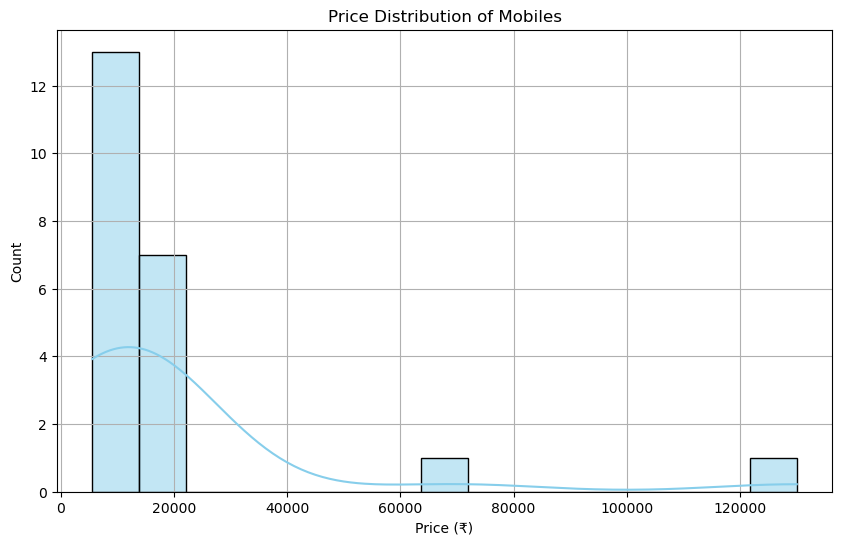

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=15, kde=True, color='skyblue')
plt.title('Price Distribution of Mobiles')
plt.xlabel('Price (₹)')
plt.ylabel('Count')
plt.grid(True)
plt.show()


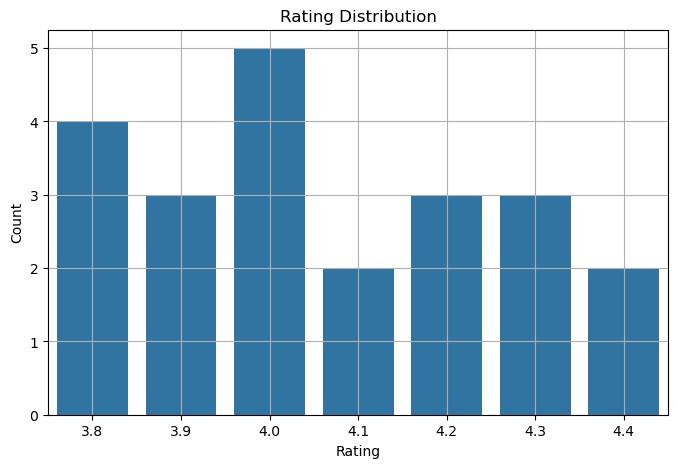

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=df)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()


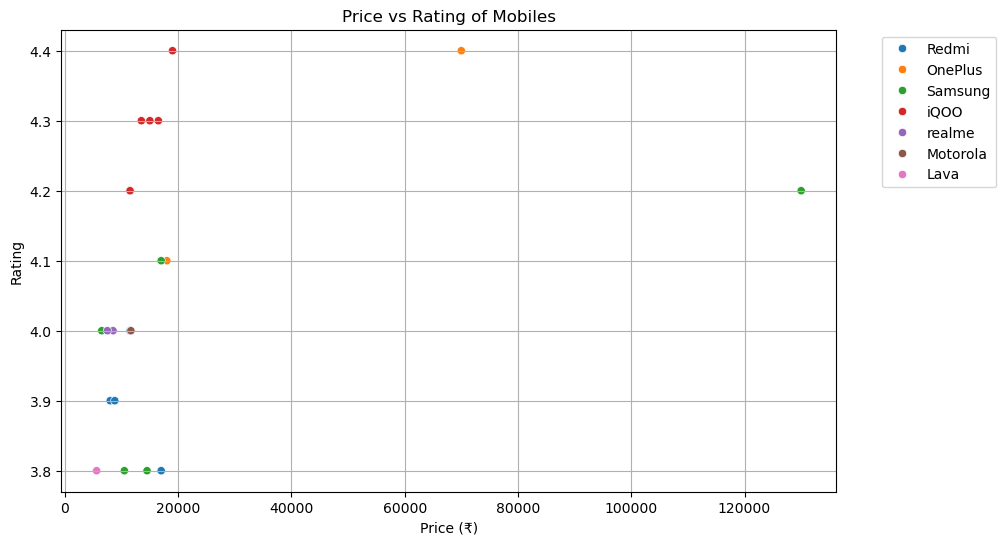

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', data=df, hue='Brand', palette='tab10')
plt.title('Price vs Rating of Mobiles')
plt.xlabel('Price (₹)')
plt.ylabel('Rating')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


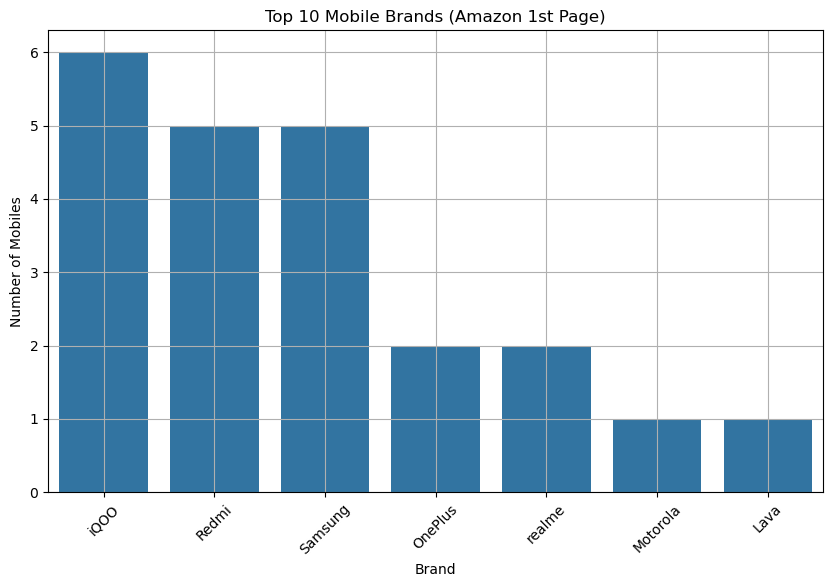

In [40]:
plt.figure(figsize=(10,6))
top_brands = df['Brand'].value_counts().nlargest(10)
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title("Top 10 Mobile Brands (Amazon 1st Page)")
plt.xlabel("Brand")
plt.ylabel("Number of Mobiles")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [41]:
df.to_csv('amazon_cleaned_mobiles.csv', index=False)
